In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family']= 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
def rho_green_light(x, rho_light):
    rho = numpy.zeros_like(x)
    mask = numpy.where(x < 2.0)
    rho[mask] = rho_light*x[mask]/2.0
    return rho

In [4]:
nx = 81
L = 4.0
dx = L/(nx-1)
nt = 30
u_max = 1.0
rho_max = 10.0
rho_light  = 10.0

x = numpy.linspace(0.0, L, num = nx)

rho0 = rho_green_light(x, rho_light)

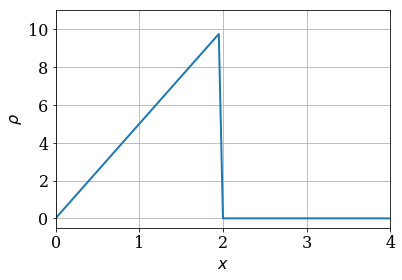

In [5]:
pyplot.figure(figsize = (6.0, 4.0))

pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
pyplot.plot(x, rho0, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0);              

In [6]:
def flux(rho, u_max, rho_max):
    F = rho*u_max*(1.0 - rho/rho_max)
    return F 

In [7]:
def ftbs():
    rho_hist= [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, *args)
        rho[1:]= rho[1:]-dt/dx*(F[1:]-F[:-1])
        rho[0] = bc_value
        rho_hist.append(rho.copy())
        return rho_hist

In [8]:
import numpy
from matplotlib import pyplot
%matplotlib inline


In [9]:
pyplot.rcParams['font.family'] = 'serif'
pyplot. rcParams['font.size'] = 16

In [10]:
def rho_red_light(x, rho_max):
    rho = rho_max*numpy.ones_like(x)
    mask = numpy.where(x < 3.0)
    rho[mask] = 0.5*rho_max
    return rho

In [11]:
nx = 81
L = 4.0
dx = L/(nx-1)
nt = 40
rho_max = 10.0
u_max = 1.0

x = numpy.linspace(0.0, L, num = nx)

rho0 = rho_red_light(x, rho_max)

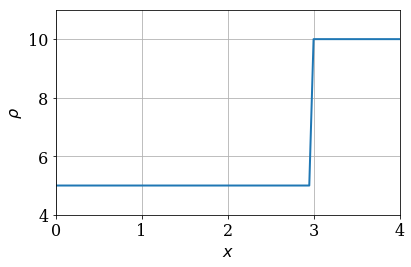

In [12]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(4.0, 11.0)
pyplot.tight_layout()

In [13]:
def flux(rho, u_max, rho_max):
    F = rho*u_max*(1.0-rho/rho_max)
    return F

In [14]:
def LF():
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, *args)
        rho[1:-1] = 0.5*(rho[2:]+rho[-2:]) - dt/(dx*2.0)*(F[2:]-F[:-2])
        rho[0] = bc_values[0]
        rho[-1] = bc_values[-1]
        rho_hist.append(rho.copy())
        return rho_hist

In [15]:
def jacobian(rho, u_max, rho_max):
    J = u_max*(1-2.0*rho/rho_max)
    return J

In [16]:
def LW():
    rho_hist = [rho0.copy()]
    rho = rho0.copy
    for n in range(nt):
        F = flux(rhjo, *args)
        J = jacobian(rho, *args)
        

In [17]:
def rho_ST(x, rho0_L, rho0_R):
    rho = numpy.ones_like(x)
    mask_1 = numpy.where(x < 0.0)
    mask_2 = numpy.where(0.0 <= x)
    rho[mask_1] = rho0_L
    rho[mask_2] = rho0_R
    return rho

In [18]:
def u_ST(x, u0_L, u0_R):
    u = numpy.ones_like(x)
    mask_1 = numpy.where(x < 0.0)
    mask_2 = numpy.where(0.0 <= x)
    u[mask_1] = u0_L
    u[mask_2] = u0_R
    return u

In [19]:
def p_ST(x, p0_L, p0_R):
    p = numpy.ones_like(x)
    mask_1 = numpy.where(x < 0.0)
    mask_2 = numpy.where(0.0 <= x)
    p[mask_1] = p0_L
    p[mask_2] = p0_R
    return p

In [20]:
nx = 81
L = 10.0
dx = 0.25
dt = 0.0002
gamma = 1.4
rho0_L = 1.0
rho0_R = 0.125
u0_L = 0.0
u0_R = 0.0
p0_L = 100000.0
p0_R = 10000.0
nt = 50

x = numpy.linspace(-L, L, num=nx)

rho0 = rho_ST(x, rho0_L, rho0_R)
u0 = u_ST(x, u0_L, u0_R)
p0 = p_ST(x, p0_L, p0_R)

In [21]:
def e_EOS(p, rho, gamma):
    e = p / ((gamma - 1) * rho)
    return e

In [22]:
e0 = e_EOS(p0, rho0, gamma)

In [23]:
def u_vec(rho, e, u):
    UV = numpy.empty([3, 81])
    UV[0, :] = rho
    UV[1, :] = u * rho
    UV[2, :] = rho * (e + u**2 / 2)
    return UV

In [24]:
UV0 = u_vec(rho0, e0, u0)

In [25]:
def flux(UV, gamma):
    f = numpy.empty([3, 81])
    f[0] = UV[1]
    f[1] = UV[1]**2 / UV[0] + (gamma - 1) * (UV[2] - 0.5 * UV[1]**2 / UV[0])
    f[2] = (UV[2] + (gamma - 1) * (UV[2] - 0.5 * UV[1]**2 / UV[0])) * (UV[1] / UV[0])
    return f

In [26]:
def RM(UV0, nt, gamma, dt, dx, bc_values):
    UV = UV0.copy()
    UV_new = UV.copy()
    for n in range(nt):
        f = flux(UV, gamma)
        UV_new[:,1:-1] = 0.5 * (UV[:,2:] + UV[:,1:-1]) - (dt / (2*dx)) * (f[:,2:] - f[:,1:-1])
        f = flux(UV_new, gamma)
        UV[:,1:-1] = UV[:,1:-1] - dt / dx * (f[:,1:-1] - f[:,:-2])
        UV[:,0] = bc_values[0]
        UV[:,-1] = bc_values[1]
    return UV

In [27]:
u_new = RM(UV0, nt, gamma, dt, dx, (UV0[:, 0], UV0[:, -1]))
vel = u_new[1] / u_new[0]
pressure = (gamma - 1) * (u_new[2] - 0.5 * u_new[1]**2 / u_new[0])
density = u_new[0]

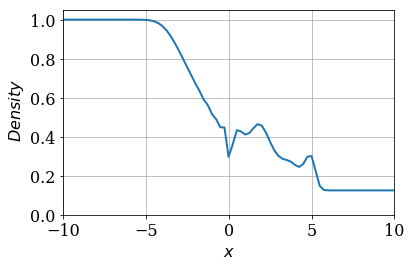

In [28]:


pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\ Density$')
pyplot.grid()
line = pyplot.plot(x, density,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(-L, L)
pyplot.ylim(0.0, 1.05)
pyplot.tight_layout()

In [1]:
import numpy
from matplotlib import pyplot 
%matplotlib inline

In [2]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [5]:
L = 1.0
nx = 51
dx = L / (nx - 1)
alpha = 1.22e-3

x = numpy.linspace(0.0, L, num=nx)   # define the locations along the rod

# initial temp
T0 = numpy.zeros(nx)
T0[0] = 100.0

In [9]:
def ftcs(T0, nt, dt, dx, alpha):
    T = T0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        T[1:-1] = T[1:-1] + sigma * (T[2:] - 2 * T[1:-1] + T[:-2])
    return T

In [10]:
nt = 100
sigma = 0.5
dt = sigma * dx**2 / alpha

T = ftcs(T0, nt, dt, dx, alpha)

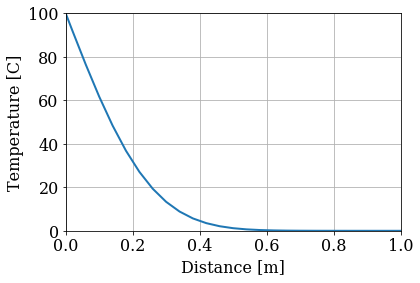

In [11]:
# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);

In [12]:
# Dirichlet b.c
nt = 1000
T = ftcs(T0, nt, dt, dx, alpha)

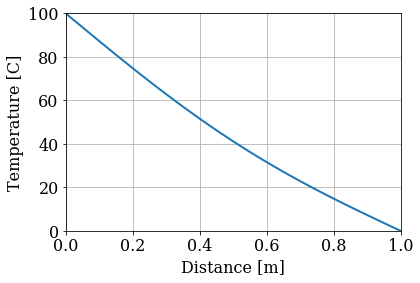

In [13]:
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);

In [26]:
def ftcs_mix(T0, nt, dt, dx, alpha):
    T = T0.copy()
    sigma = alpha * dt  / dx**2
    for n in range(nt):
        T[1:-1] = T[1:-1] + sigma * (T[2:] - 2.0 * T[1:-1] + T[:-2])
        # Neumannc b.c with zero
        T[-1] = T[-2]
    return T

In [27]:
nt = 1000
T = ftcs_mix(T0, nt, dt, dx, alpha)

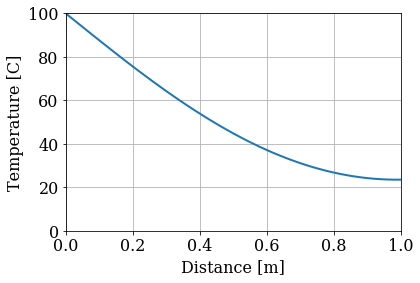

In [28]:
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);

In [41]:
L = 1.0
nx = 51
dx = L / (nx- 1)
alpha = 1.22e-3
q = 0.0      # temp. gradient on the right side of the  od

x = numpy.linspace(0.0, L, num=nx)

T0 = numpy.zeros(nx)
T0[0] = 100.0

In [56]:
from scipy import linalg

In [57]:
D = numpy.diag((2.0 + 1.0 /0.5) * numpy.ones(3))
print(D)
D[-1, -1] = 3.0
print(D)
U = numpy.diag( -1.0 * numpy.ones(2), k=-1)
print(U)

[[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]
[[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 3.]]
[[ 0.  0.  0.]
 [-1.  0.  0.]
 [ 0. -1.  0.]]


In [59]:
def lhs(N, sigma):
    # the diagonal of the operator
    D = numpy.diag((2.0 + 1.0 /sigma) * numpy.ones(N))
    # the Neumann condiotion for the last element
    D[-1, -1] = 1.0 + (1.0 / sigma)
    # the upper diagonal
    U = numpy.diag( -1.0 * numpy.ones(N -1), k = 1)
    # the lower diagonal
    L = numpy.diag(-1.0 *  numpy.ones(N-1), k = -1)
    # assem
    A = D + U + L
    return A

In [60]:
def rhs(T, sigma, qdx):
    b = T[1:-1] / sigma
    # Dirichlet
    b[0] += T[0]
    # Neumann 
    b[-1] += qdx
    return b

In [61]:
def btcs_implicit(T0, nt, dt, dx, alpha, q):
    sigma = alpha * dt / dx**2
    A = lhs(len(T0) -2, sigma)
    T = T0.copy()
    for n in range(nt):
        b = rhs(T, sigma, q*dx)
        T[1:-1] = linalg.solve(A, b)
        T[-1] = T[-2] + q * dx
    return T

In [62]:
sigma = 0.5
dt = sigma * dx**2 / alpha
nt = 1000

T = btcs_implicit(T0, nt, dt, dx, alpha, q)

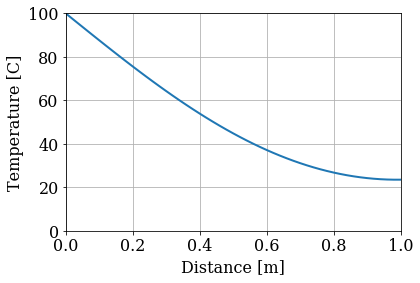

In [63]:
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);

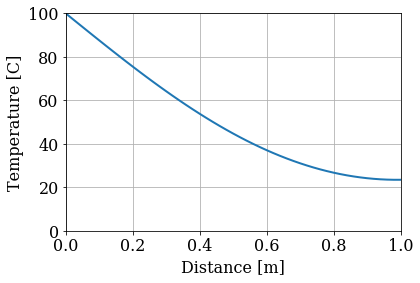

In [64]:
sigma = 5.0
dt = sigma * dx**2 / alpha  # time-step size
nt = 100  # number of time steps to compute

# Compute the temperature along the rod.
T = btcs_implicit(T0, nt, dt, dx, alpha, q)

# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);

In [66]:
import numpy
from matplotlib import pyplot
%matplotlib inline


In [67]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [73]:
def ftcs(T0, nt, dt, dx, dy, alpha):
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dx**2
    T = T0.copy()
    ny, nx = T.shape
    I, J = int(nx/2), int(ny/2)      # indicies of the centers
    for n in range(nt):
        T[1:-1, 1:-1] = T[1:-1, 1:-1] + (sigma_x * (T[1:-1, 2:] - 2.0 * T[1:-1, 1:-1] + T[1:-1, :-2]) + sigma_y * (T[2:, 1:-1] - 2.0 * T[1:-1, 1:-1] + T[:-2, 1:-1]) )
        # Neumann with zero
        T[-1, :] = T[-2, :]
        T[:, -1] = T[:, -2]
        # check if the center of the domian has received T = 70
        if T[J, I] >= 70.0:
            break
        print('[time step {}] Center at T={:.2f} at t={:.2f} s'
          .format(n + 1, T[J, I], (n + 1) * dt))   
    return T

In [74]:
Lx = 0.01
Ly = 0.01
nx = 21
ny = 21
dx = Lx / (nx -1)
dy = Ly / (ny -1)
alpha = 1e-4

x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

Tb = 100.0
T0 = 20.0 * numpy.ones((ny, nx))
T0[0, :] = Tb
T0[:, 0] = Tb

In [75]:
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha
nt = 500

T = ftcs(T0, nt, dt, dx, dy, alpha)

[time step 1] Center at T=20.00 at t=0.00 s
[time step 2] Center at T=20.00 at t=0.00 s
[time step 3] Center at T=20.00 at t=0.00 s
[time step 4] Center at T=20.00 at t=0.00 s
[time step 5] Center at T=20.00 at t=0.00 s
[time step 6] Center at T=20.00 at t=0.00 s
[time step 7] Center at T=20.00 at t=0.00 s
[time step 8] Center at T=20.00 at t=0.00 s
[time step 9] Center at T=20.00 at t=0.01 s
[time step 10] Center at T=20.00 at t=0.01 s
[time step 11] Center at T=20.00 at t=0.01 s
[time step 12] Center at T=20.00 at t=0.01 s
[time step 13] Center at T=20.01 at t=0.01 s
[time step 14] Center at T=20.02 at t=0.01 s
[time step 15] Center at T=20.03 at t=0.01 s
[time step 16] Center at T=20.05 at t=0.01 s
[time step 17] Center at T=20.08 at t=0.01 s
[time step 18] Center at T=20.12 at t=0.01 s
[time step 19] Center at T=20.17 at t=0.01 s
[time step 20] Center at T=20.23 at t=0.01 s
[time step 21] Center at T=20.31 at t=0.01 s
[time step 22] Center at T=20.39 at t=0.01 s
[time step 23] Cent

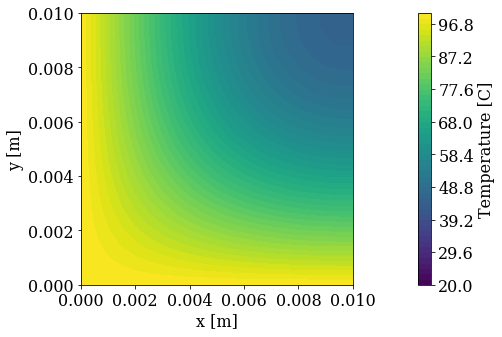

In [76]:
pyplot.figure(figsize=(8.0, 5.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
levels = numpy.linspace(20.0, 100.0, num=51)
contf = pyplot.contourf(x, y, T, levels=levels)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')
pyplot.axis('scaled', adjustable='box');

In [1]:
import numpy
from scipy import linalg

In [3]:
def btcs(T0, nt, dt, delta, alpha, Tb):
    ny, nx = T0.shape
    M, N = nx - 2, ny -2
    sigma = alpha * dt / delta**2
    A = lhs(M, N, sigma)
    T = T0[1:-1, 1:-1].flatten()
    I, J = int(M/2), int(N/2)
    for n in range(nt):
        b = rhs(T, M, N, sigma, Tb)
        T = linalg.solve(A, b)
        if T[J * M + I] >= 70.0:
            break
    print('Time step {}; temperature at center is {} C'.format(n, T[J * M + I]))
    return   map_1d_to_2d(T, nx, ny, Tb)

In [4]:
def   map_1d_to_2d(T, nx, ny, Tb):
    T = numpy.zeros((ny, nx))
    T[1:-1, 1:-1] = T1.reshape((ny -2, nx -2))
    T[:, 0] = Tb
    T[0, :] = Tb
    T[:, -1] = T[:, -2]
    T[-1, :] = T[-2, :]
    return T

In [ ]:
def lhs():
    A = numpy.zeros((M*N, M*N))
    for j in range(N):
        for i in ranghe(M):
            I = j * M + i # row index
            
     